In [1]:
def add_node(graph, node_to_add):
    if node_to_add not in graph:
        graph[node_to_add] = set()
    return graph

def add_connection(graph, origin, destination):
    add_node(graph, origin)
    add_node(graph, destination)
    graph[origin].add(str(destination))
    return graph

def delete_connection(graph, origin, destination):
    graph[origin].discard(str(destination))
    return graph

def delete_node(graph, node_to_delete):
    del graph[node_to_delete]
    for node in graph:
        delete_connection(graph, node, node_to_delete)
    return graph

graph = {}

add_node(graph, 'v1')
add_node(graph, 'v2')
add_node(graph, 'v3')
add_node(graph, 'v4')
add_node(graph, 'v5')
add_node(graph, 'v6')

add_connection(graph, 'v1', 'v2')
add_connection(graph, 'v1', 'v6')
add_connection(graph, 'v2', 'v4')
add_connection(graph, 'v2', 'v5')
add_connection(graph, 'v2', 'v6')
add_connection(graph, 'v3', 'v2')
add_connection(graph, 'v4', 'v3')
add_connection(graph, 'v5', 'v2')
add_connection(graph, 'v6', 'v5')


{'v1': {'v2', 'v6'},
 'v2': {'v4', 'v5', 'v6'},
 'v3': {'v2'},
 'v4': {'v3'},
 'v5': {'v2'},
 'v6': {'v5'}}

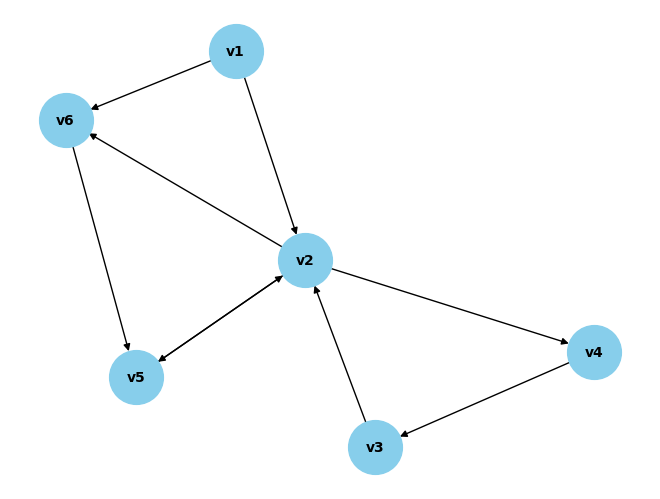

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    G = nx.DiGraph()
    for node, connections in graph.items():
        G.add_node(node)
        for connection in connections:
            G.add_edge(node, connection)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', arrows=True)
    plt.show()

# Example graph
graph = {
    'v1': {'v2', 'v6'},
    'v2': {'v4', 'v5', 'v6'},
    'v3': {'v2'},
    'v4': {'v3'},
    'v5': {'v2'},
    'v6': {'v5'}
}

# Visualize the graph
visualize_graph(graph)


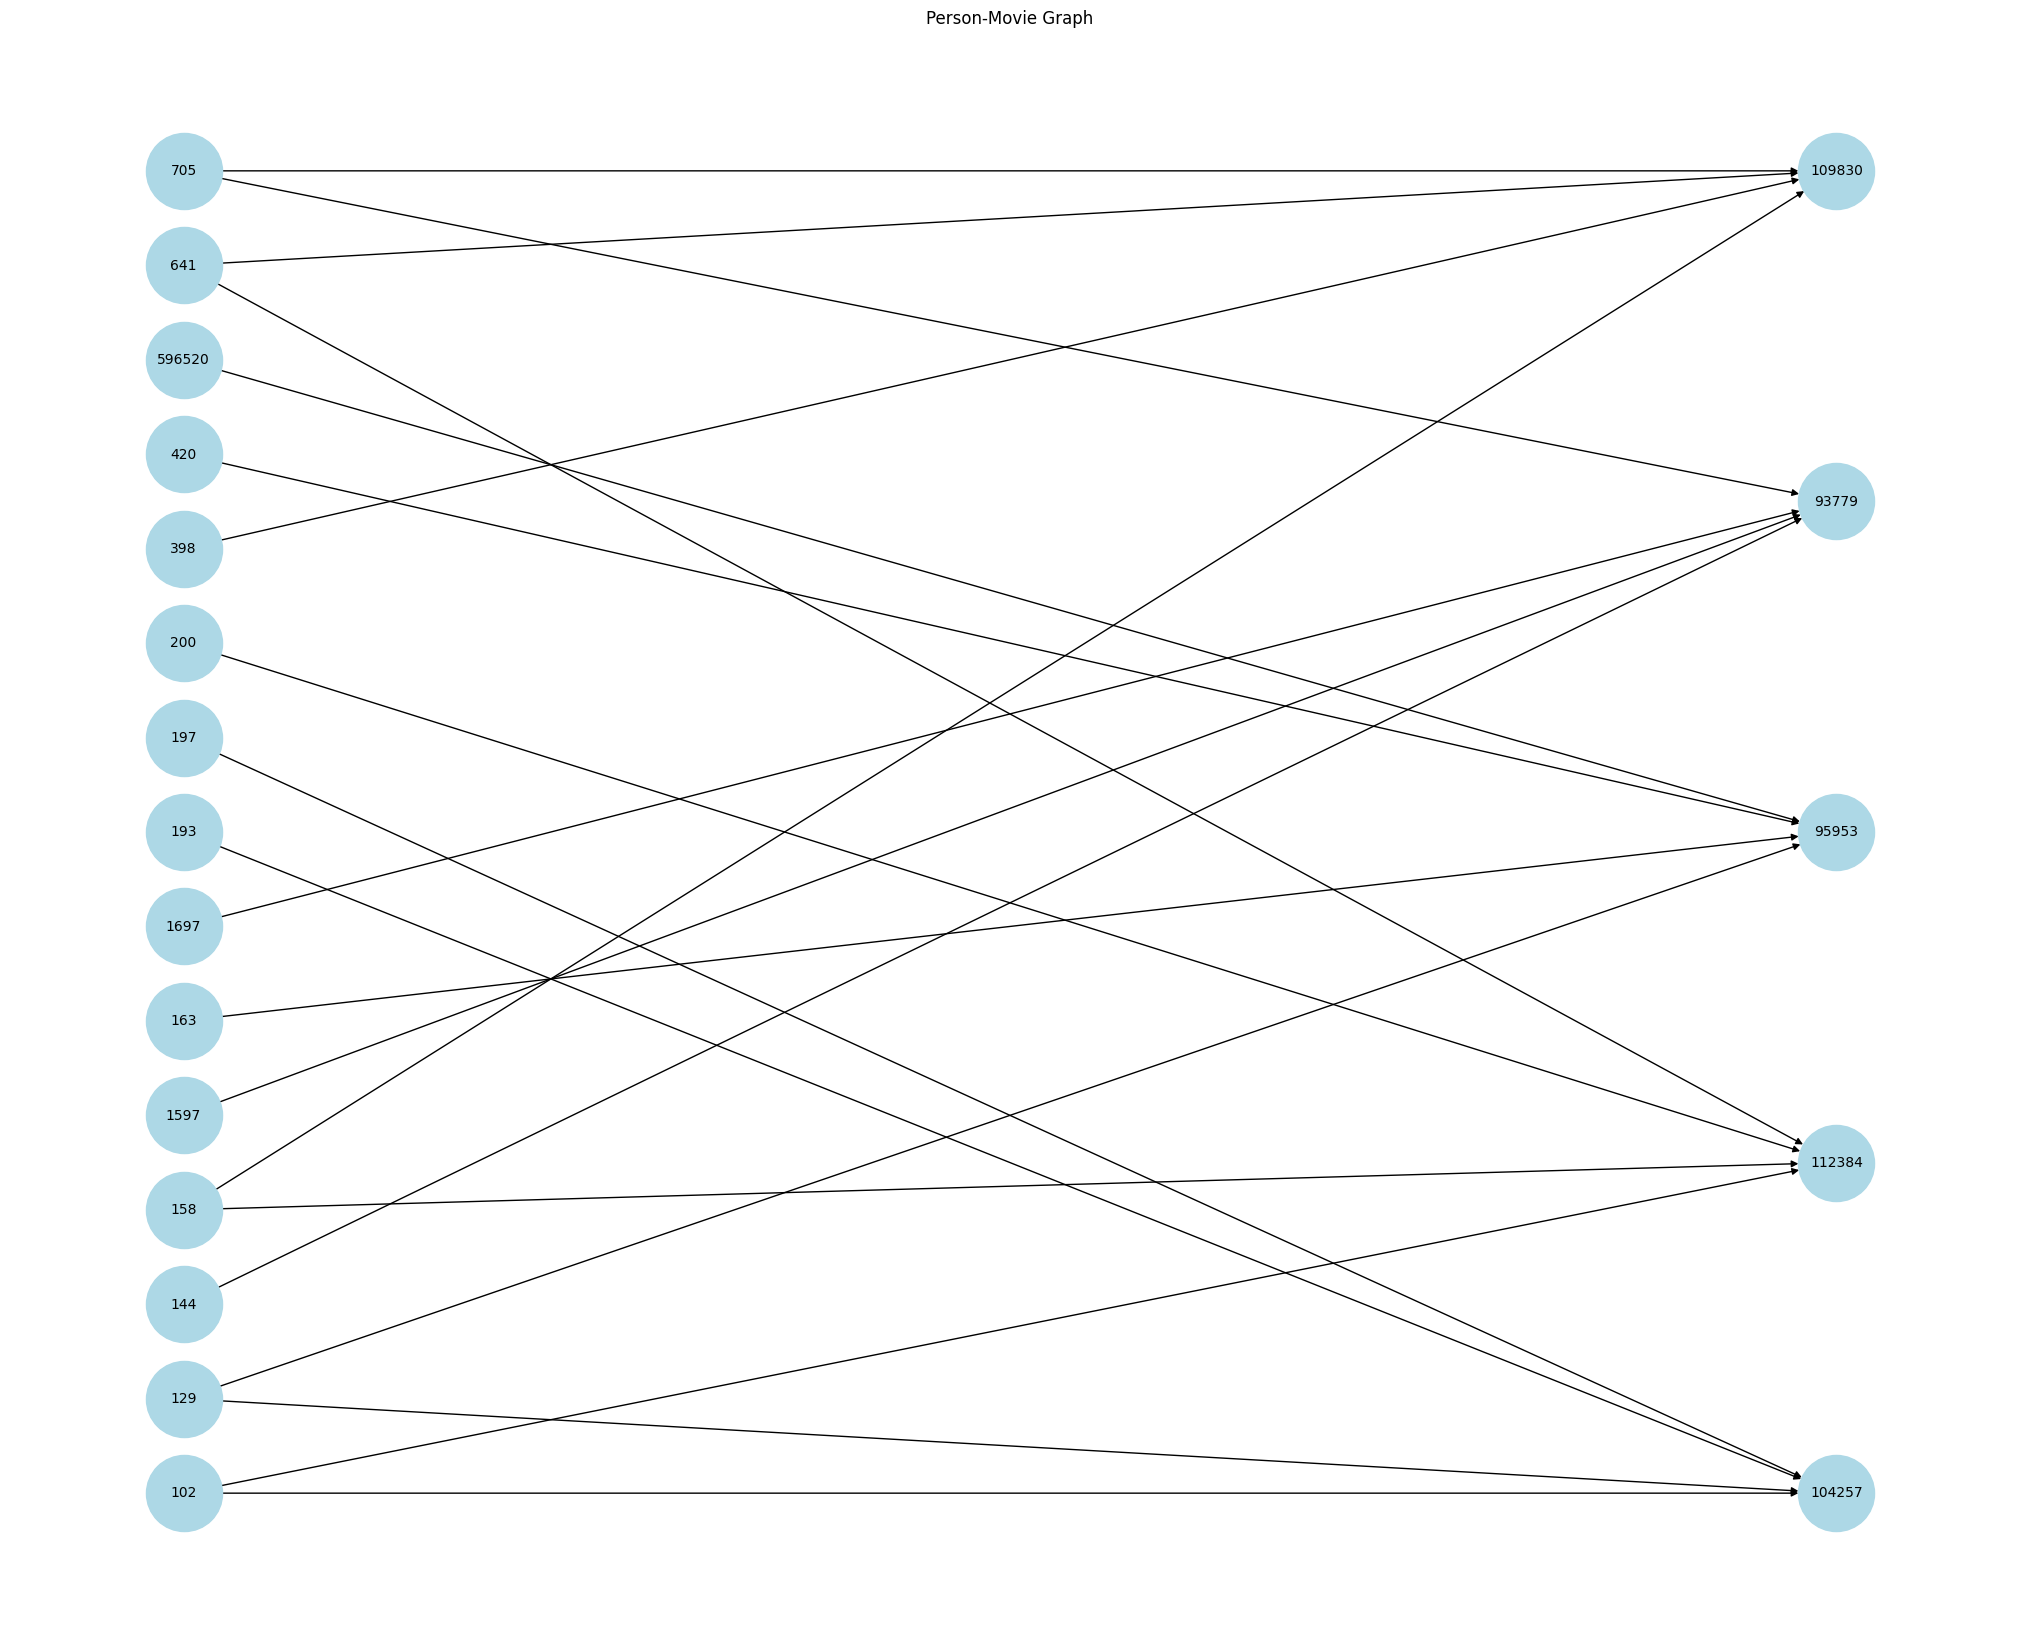

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
people = [102, 129, 144, 158, 1597, 163, 1697, 193, 197, 200, 398, 420, 596520, 641, 705]
movies = [104257, 112384, 95953, 93779]
G.add_nodes_from(people, bipartite=0)
G.add_nodes_from(movies, bipartite=1)

# Add edges
edges = [
    (102, 104257), (102, 112384), (129, 104257), (129, 95953), (144, 93779), 
    (158, 109830), (158, 112384), (1597, 93779), (163, 95953), (1697, 93779), 
    (193, 104257), (197, 104257), (200, 112384), (398, 109830), (420, 95953), 
    (596520, 95953), (641, 109830), (641, 112384), (705, 109830), (705, 93779)
]
G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(20, 16))
pos = nx.bipartite_layout(G, people)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
plt.title('Person-Movie Graph')
plt.show()
